# Face Detection with OpenCV

In [47]:
#!pip install opencv-python
import cv2
from matplotlib import pyplot as plt
import numpy

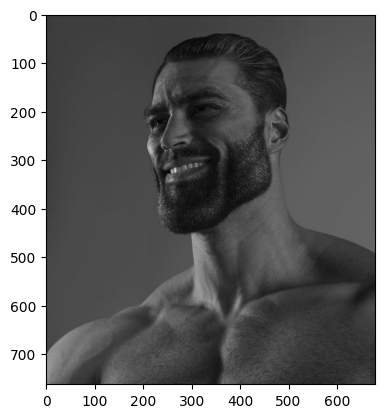

In [48]:
image1=cv2.imread(r"D:/python/pythonProject/YT/Images/chad.jpg")
plt.imshow(image1)
plt.imshow(image1,cmap="gray")

In [49]:
cv2.data.haarcascades

'c:\\Users\\akash\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\data\\'

In [50]:
face_detector= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [51]:
def detect_face(image):
    face_image=image.copy()
    face_rectangle=face_detector.detectMultiScale(face_image)
    for (x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width, y+height),(255,255,255),8)
    return face_image

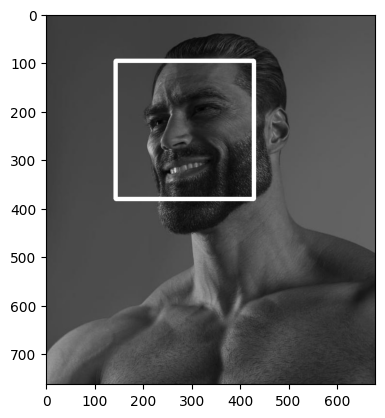

In [52]:
detection_result= detect_face(image1)
plt.imshow(detection_result, cmap="gray")

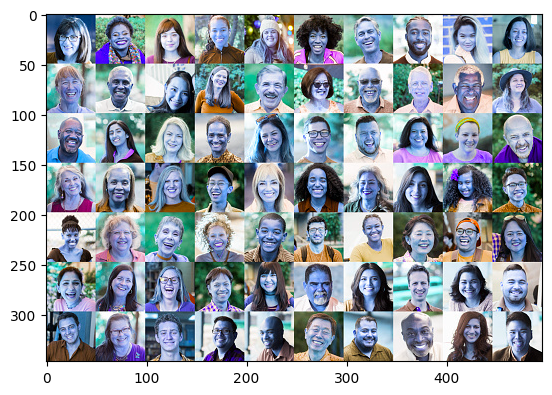

In [53]:
image2= cv2.imread(r"D:/python/pythonProject/YT/Images/multiple.jpg")
plt.imshow(image2)
plt.imshow(image2,cmap="gray")

In [54]:
face_detector= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_alt.xml')

In [55]:
def detect_face(image):
    face_image=image.copy()
    face_rectangle=face_detector.detectMultiScale(face_image)
    for (x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width, y+height),(255,255,255),8)
    return face_image

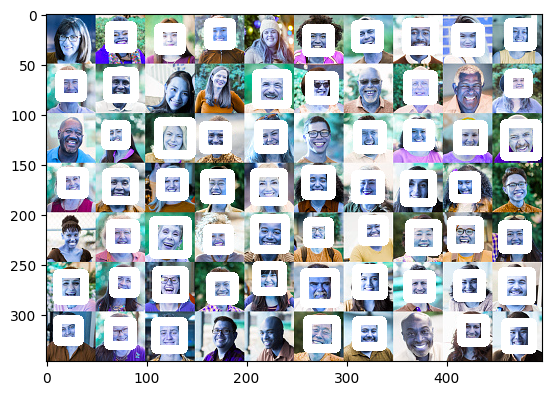

In [56]:
detection_result= detect_face(image2)
plt.imshow(detection_result, cmap="gray")

In [57]:
eye_detector= cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

def detect_eye(image):
    face_image=image.copy()
    face_rectangle=eye_detector.detectMultiScale(face_image)
    for (x,y,width,height) in face_rectangle:
        cv2.rectangle(face_image,(x,y),(x+width, y+height),(255,255,255),8)
    return face_image

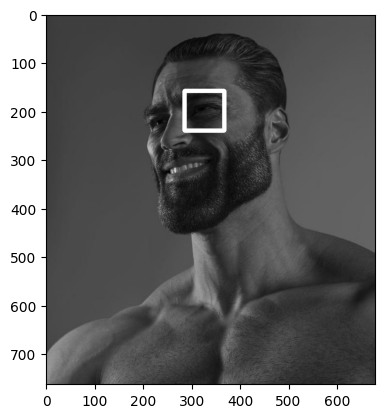

In [58]:
detection_result= detect_eye(image1)
plt.imshow(detection_result, cmap="gray")

# Sentiment Analysis using NLP & Classification Algorithm

Sentiment Analysis means to analyse and find the emotion or intent behind a piece of text or speech or any mode
of communication

This burger has a very bad taste- negative review

I ordered this pizza today- neutral sentiment/review

I love this cheese sandwich, it's so delicious- positive sentiment/review

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

NLTK- Natural Language Processing Toolkit

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [63]:
df_train= pd.read_csv("D:/python/pythonProject/Internship/amazon_product_review.csv",delimiter=";",names=['text','label'])
df_val=pd.read_csv("D:/python/pythonProject/Internship/amazon_product_review.csv",delimiter=";",names=['text','label'])

In [64]:
df=pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [65]:
print("Shape of the dataframe: ",df.shape)
df.sample(5)

Shape of the dataframe:  (3196, 2)


,text,label
689,"AVzRlo37glJLPUi8FbPy,B01LW1MS9C,Amazon,""Amazon...",NaN
2351,"AV1T1naH-jtxr-f31CpM,B01M71HRMY,Amazon,""Electr...",NaN
2778,"AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,""Amazon...",NaN
1099,"AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,""Amazon...",NaN
1300,"AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,""Amazon...",NaN


<Axes: xlabel='count', ylabel='label'>

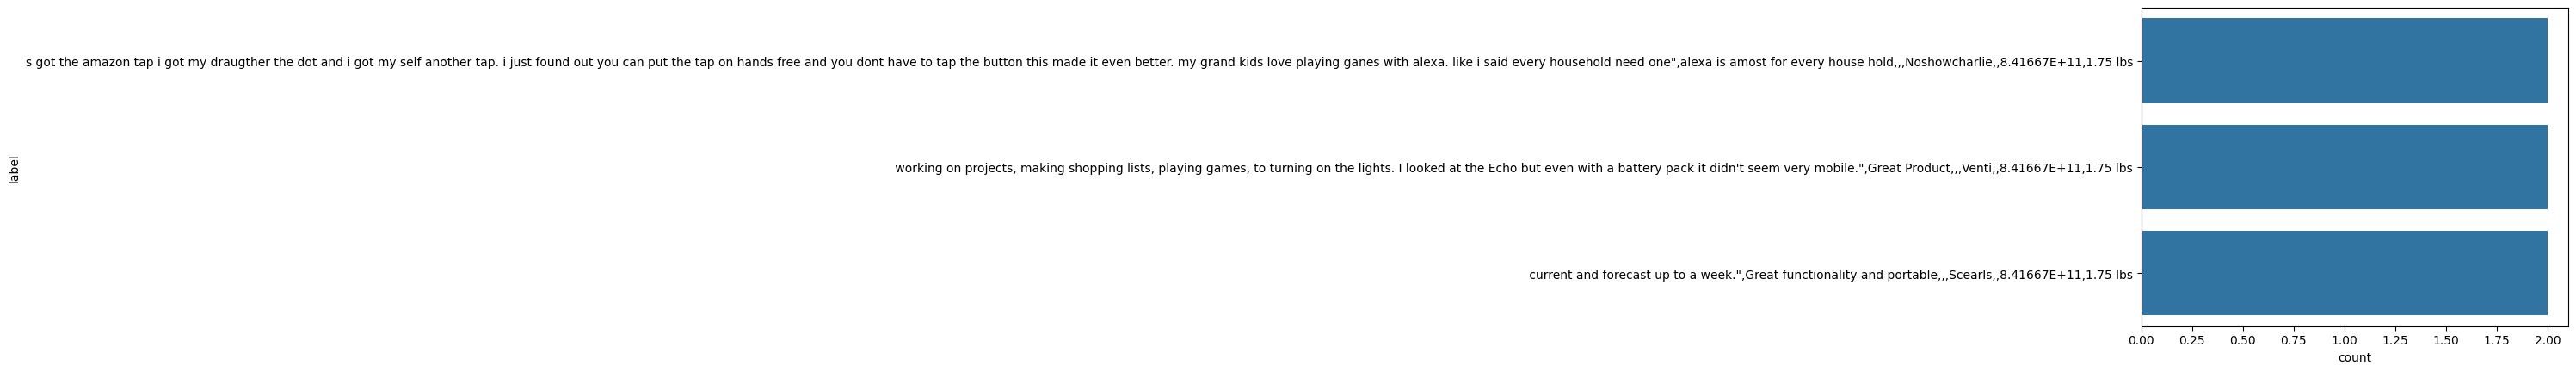

In [66]:
sns.countplot(df.label)

As we can see that, we have 6 labels or targets in the datasets.

Positive Sentiment- joy, love, surprise

Negative sentiment- anger, sadness, fear

In [67]:
def custom_encoder(df):
    df.replace(to_replace="surprise",value=1, inplace=True)
    df.replace(to_replace="love",value=1, inplace=True)
    df.replace(to_replace="joy",value=1, inplace=True)
    df.replace(to_replace="fear",value=0, inplace=True)
    df.replace(to_replace="anger",value=0, inplace=True)
    df.replace(to_replace="sadness",value=0, inplace=True)

In [68]:
custom_encoder(df['label'])

<Axes: xlabel='count', ylabel='label'>

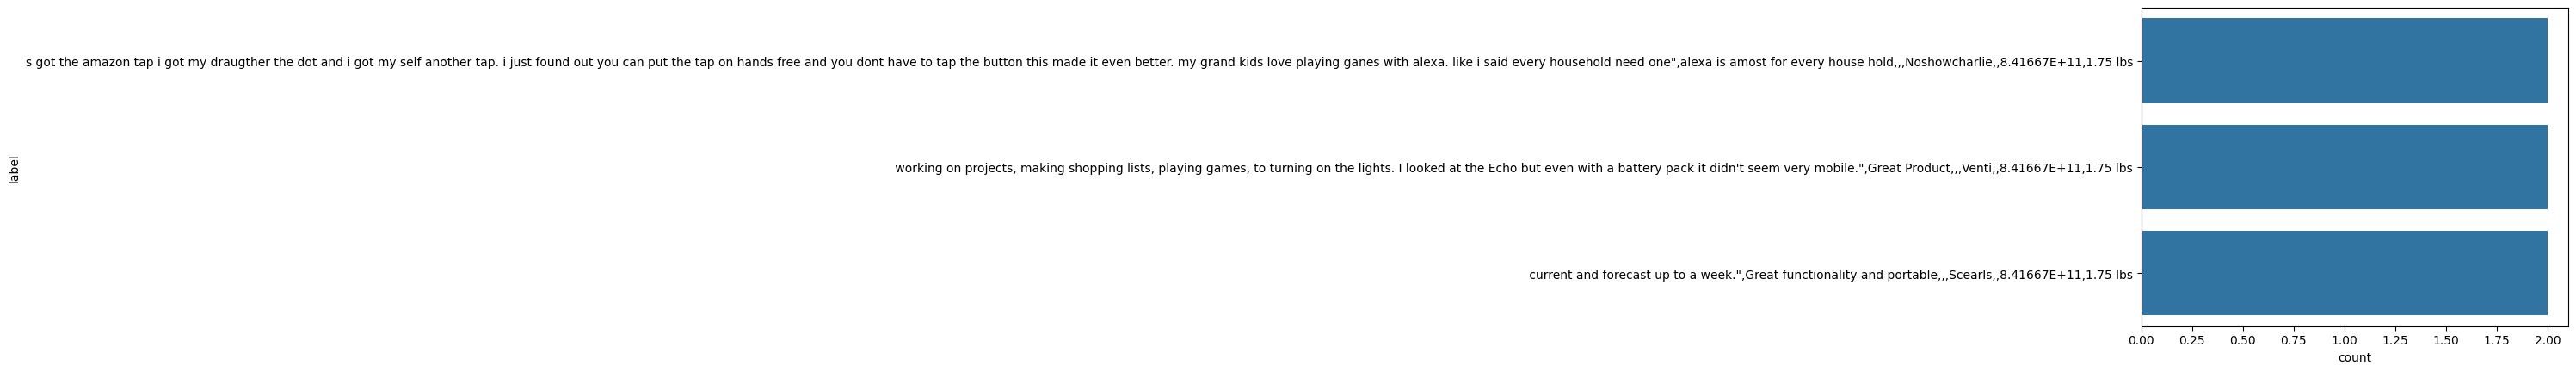

In [69]:
sns.countplot(df['label'])

1. Remove all characters except alphabets

2. Convert into lowercase

3. Remove stopwords

4. Lemmatization

5. Count Vectorization

In [70]:
lm=WordNetLemmatizer()

In [71]:
def text_transformation(df_col):
    corpus=[]
    for item in df_col:
        new_item= re.sub('[^a-zA-Z]',' ',str(item))
        new_item=new_item.lower()
        new_item=new_item.split()
        new_item=[lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [72]:
corpus=text_transformation(df['text'])

KeyboardInterrupt: 

In [ ]:
corpus[:2]

In [ ]:
cv=CountVectorizer(ngram_range=(1,2))
traindata=cv.fit_transform(corpus)

X=traindata
y=df.label

In [ ]:
parameters={'max_features':('auto','sqrt'),
           'n_estimators':[5,10],
           'max_depth':[10,None],
           'min_samples_split':[5],
           'min_samples_leaf':[1],
           'bootstrap':[True]
           }

Now we will fit the data into the grid search and view the best parameter using the best_params attribute

In [ ]:
grid_search= GridSearchCV(RandomForestClassifier(), parameters, cv=5, return_train_score=True, n_jobs=1)
grid_search.fit(X,y)
grid_search.best_params_

In [ ]:
for i in range(8):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean test score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'])

Now we will choose the best parameter obtained from GridSearchCV and create a final random forest classifier model

In [ ]:
rfc=RandomForestClassifier(max_features= grid_search.best_params_['max_features'],
                          max_depth= grid_search.best_params_['max_depth'],
                          n_estimators= grid_search.best_params_['n_estimators'],
                          min_samples_split= grid_search.best_params_['min_samples_split'],
                          min_samples_leaf= grid_search.best_params_['min_samples_leaf'],
                          bootstrap= grid_search.best_params_['bootstrap'])

rfc.fit(X,y)

In [ ]:
test_df= pd.read_csv('test.txt',delimiter=";",names=['text','label'])

In [ ]:
X_test, y_test=test_df.text, test_df.label

# encode the l;abels into two classes 0 and 1
test_df= custom_encoder(y_test)
# pre-processing of text
test_corpus=text_transformation(X_test)
# convert text data into vectors
testdata=cv.transform(test_corpus)
# predict the target
predictions=rfc.predict(testdata)

In [ ]:
acc_score= accuracy_score(y_test, predictions)
pre_score=precision_score(y_test, predictions)
rec_score= recall_score(y_test, predictions)

print('Accuracy Score:',acc_score)
print('Precision Score:',pre_score)
print('Recall Score:',rec_score)
print("-"*50)
cr=classification_report(y_test, predictions)
print(cr)

In [ ]:
predictions_probability=rfc.predict_proba(testdata)
fpr,tpr,thresholds=roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
def expression_check(prediction_input):
    if prediction_input==0:
        print("Input statement has negative sentiment")
    elif prediction_input==1:
        print("Input statement has positive sentiment")
    else:
        print("Invalid Statement")

In [ ]:
def sentiment_predictor(input):
    input=text_transformation(input)
    transformed_input=cv.transform(input)
    prediction=rfc.predict(transformed_input)
    expression_check(prediction)

In [ ]:
input1=["Sometimes I just don't want to go out"]
input2=["I bought a new phone and it's so good"]

In [ ]:
sentiment_predictor(input1)
sentiment_predictor(input2)

# Chatbot using NLP and Neural Networks in Python

In [ ]:
# tag means classes
# patterns means what user is going to ask
# response which is chatbot response

data={"intents":[
    {"tag":"greeting",
    "patterns":["Hello","How are you?","Hi There","Hi","What's up"],
    "responses":["Howdy Partner!","Hello","How are you dong?","Greetings!","How do you do?"]
    },
    {"tag":"age",
    "patterns":["How old are you","when is your birthday","when was you born"],
    "responses":["I am 24 years old","I was born in 1996","My birthday is July 3rd and I was born in 1996","03/07/1996"]
    },
    {"tag":"date",
    "patterns":["what are you doing this weekend?",
               "do you want to hangout sometime?","what are your plans for this week"],
    "responses":["I am available all week","I don't have any plans","I am not busy"]
    },
    {"tag":"name",
    "patterns":["what's your name","what are you called","who are you"],
    "responses":["My name is Kippi","I'm Kippi","Kippi"]
    },
    {"tag":"goodbye",
    "patterns":["bye","g2g","see ya","adios","cya"],
    "responses":["It was nice speaking to you","See you later","Speak soon"]
    }
    
]}

For each tag we created, we would specify patterns. Essentially, this defines the differnet ways of how a user may pose a query
to the chatbot.

The chatbot would then take these patterns and use them as training data to determine what someone is asking.

In [ ]:
import json
import string
import random

import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohit
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In order to create our training data below steps to be followed:

1. Create a vocabulary of all the words used in the patterns

2. Create a list of the classes- tags of each intent

3. Cretae a list of all the patterns within the intents file

4. Create a lsit of all the associated tags to go with eah patterns in the intents file

In [ ]:
lemmatizer=WordNetLemmatizer()

words=[]
classes=[]
doc_x=[]
doc_y=[]

Loop through all the intents

Tokenize each pattern and append token to words, the patterns and the associated tag
to their associated list.

In [ ]:
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens=nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_x.append(pattern)
        doc_y.append(intent["tag"])
    if intent["tag"] not in classes:
        classes.append(intent["tag"])

Lemmatize all the words in the vocab and convert them to lowercase

In [ ]:
words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]

sorting the vocab and classes in alphabetical order and taking the set to ensure no duplicates occur

In [ ]:
words=sorted(set(words))
classes=sorted(set(classes))

In [ ]:
print(words)

["'s", 'adios', 'are', 'birthday', 'born', 'bye', 'called', 'cya', 'do', 'doing', 'for', 'g2g', 'hangout', 'hello', 'hi', 'how', 'is', 'name', 'old', 'plan', 'see', 'sometime', 'there', 'this', 'to', 'up', 'wa', 'want', 'week', 'weekend', 'what', 'when', 'who', 'ya', 'you', 'your']


In [ ]:
print(classes)

['age', 'date', 'goodbye', 'greeting', 'name']


In [ ]:
print(doc_x)

['Hello', 'How are you?', 'Hi There', 'Hi', "What's up", 'How old are you', 'when is your birthday', 'when was you born', 'what are you doing this weekend?', 'do you want to hangout sometime?', 'what are your plans for this week', "what's your name", 'what are you called', 'who are you', 'bye', 'g2g', 'see ya', 'adios', 'cya']


In [ ]:
print(doc_y)

['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'age', 'age', 'age', 'date', 'date', 'date', 'name', 'name', 'name', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye']


In [ ]:
training=[]
out_empty=[0]*len(classes)

for idx, doc in enumerate(doc_x):
    bow=[]
    text=lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    output_row=list(out_empty)
    output_row[classes.index(doc_y[idx])]=1
    
    training.append([bow, output_row])

random.shuffle(training)

training=np.array(training, dtype=object)

train_X=np.array(list(training[:,0]))
train_y=np.array(list(training[:,1]))

The model will look at the features and predict the tag associated with the features and then it will
select an appropriate message/response from the tag.

In [ ]:
input_shape=(len(train_X[0]),)
output_shape=len(train_y[0])
epochs=200

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=input_shape, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation='softmax'))
adam=tf.keras.optimizers.Adam(learning_rate=0.01,decay=1e-6)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=["accuracy"])

print(model.summary())
model.fit(x=train_X,y=train_y,epochs=200,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4736      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 13,317
Trainable params: 13,317
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 74/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 75/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 76/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 77/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9474
Epoch 78/200
1/1 [==============================] - 0s 3ms/step - loss: 3.1502e-04 - accuracy: 1.0000
Epoch 79/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 80/200
1/1 [==============================] - 0s 4ms/step - loss: 5.8634e-04 - accuracy: 1.0000
Epoch 81/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 82/200
1/1 [==============================] - 0s 4ms/step - loss: 4.1761e-04 - accuracy: 1.0000
Epoch 83/200
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 5.5037e-04 - accuracy: 1.0000
Epoch 155/200
1/1 [==============================] - 0s 5ms/step - loss: 3.4766e-04 - accuracy: 1.0000
Epoch 156/200
1/1 [==============================] - 0s 3ms/step - loss: 6.5243e-05 - accuracy: 1.0000
Epoch 157/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 158/200
1/1 [==============================] - 0s 4ms/step - loss: 7.9667e-04 - accuracy: 1.0000
Epoch 159/200
1/1 [==============================] - 0s 4ms/step - loss: 5.2529e-04 - accuracy: 1.0000
Epoch 160/200
1/1 [==============================] - 0s 5ms/step - loss: 4.1421e-04 - accuracy: 1.0000
Epoch 161/200
1/1 [==============================] - 0s 4ms/step - loss: 8.3320e-04 - accuracy: 1.0000
Epoch 162/200
1/1 [==============================] - 0s 4ms/step - loss: 8.8783e-04 - accuracy: 1.0000
Epoch 163/200
1/1 [==============================] - 0s 2ms/step - loss: 1.4545e-04 - accur

In [ ]:
def clean_text(text):
    tokens=nltk.word_tokenize(text)
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def bag_of_words(text, vocab):
    tokens=clean_text(text)
    bow=[0]*len(vocab)
    for w in tokens:
        for idx, word in enumerate(vocab):
            if word==w:
                bow[idx]=1
    return np.array(bow)

In [ ]:
def pred_class(tet, vocab, labels):
    bow=bag_of_words(text,vocab)
    result= model.predict(np.array([bow]))[0]
    thresh=0.2
    y_pred=[[idx,res] for idx, res in enumerate(result) if res>thresh]
    
    y_pred.sort(key=lambda x:x[1],reverse=True)
    return_list=[]
    for r in y_pred:
        return_list.append(labels[r[0]])
    return return_list

def get_response(intents_list, intents_json):
    tag=intents_list[0]
    list_of_intents=intents_json["intents"]
    for i in list_of_intents:
        if i["tag"]==tag:
            result=random.choice(i["responses"])
            break
    return result

Running the chatbot

In [ ]:
while True:
    message=input("")
    intents=pred_class(message, words, classes)
    result=get_response(intents,data)
    print(result)

hello
1/1 [==============================] - 0s 65ms/step
See you later


KeyboardInterrupt: Interrupted by user

# Churn Modelling Project

In [ ]:
import pandas as pd

churn_df= pd.read_csv("Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df= churn_df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
X=churn_df.drop(['Exited'],axis=1)

y=churn_df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
numerical=X.drop(['Geography','Gender'],axis=1)
numerical.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
categorical= X.filter(['Geography','Gender'])
categorical.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
import pandas as pd

cat_numerical=pd.get_dummies(categorical)
cat_numerical.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [ ]:
X=pd.concat([numerical, cat_numerical],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression()

classifier=log_clf.fit(X_train, y_train)

y_pred= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


SMOTE